# EDA

In [27]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

notebooks_dir = Path.cwd()
project_dir = notebooks_dir.parent
data_dir = project_dir / 'data' / 'external'
text_data_path = data_dir / 'Subtask_2_train.json'

In [39]:
text_data = json.loads(text_data_path.read_text())
for i in range(len(text_data[0]['conversation'])):
    print(text_data[0]['conversation'][i])

{'utterance_ID': 1, 'text': 'Alright , so I am back in high school , I am standing in the middle of the cafeteria , and I realize I am totally naked .', 'speaker': 'Chandler', 'emotion': 'neutral', 'video_name': 'dia1utt1.mp4'}
{'utterance_ID': 2, 'text': 'Oh , yeah . Had that dream .', 'speaker': 'All', 'emotion': 'neutral', 'video_name': 'dia1utt2.mp4'}
{'utterance_ID': 3, 'text': 'Then I look down , and I realize there is a phone ... there .', 'speaker': 'Chandler', 'emotion': 'surprise', 'video_name': 'dia1utt3.mp4'}
{'utterance_ID': 4, 'text': 'Instead of ... ?', 'speaker': 'Joey', 'emotion': 'surprise', 'video_name': 'dia1utt4.mp4'}
{'utterance_ID': 5, 'text': 'That is right .', 'speaker': 'Chandler', 'emotion': 'anger', 'video_name': 'dia1utt5.mp4'}
{'utterance_ID': 6, 'text': 'Never had that dream .', 'speaker': 'Joey', 'emotion': 'neutral', 'video_name': 'dia1utt6.mp4'}
{'utterance_ID': 7, 'text': 'No .', 'speaker': 'Phoebe', 'emotion': 'neutral', 'video_name': 'dia1utt7.mp4'}

In [61]:
conversation_count = len(text_data)
utterance_count = [len(text_data[i]['conversation']) for i in range(conversation_count)]

print(f"Number of conversations: {conversation_count}")
print(f"Total number of utterances: {np.sum(utterance_count)}")
print(f"Average conversation length (number of utterances): {np.mean(utterance_count):.4f}")
print(f"Min conversation length (number of utterances): {np.min(utterance_count)}")
print(f"Max conversation length (number of utterances): {np.max(utterance_count)}")
print(f"SD conversation length (number of utterances): {np.std(utterance_count):.4f}")


Number of conversations: 1374
Total number of utterances: 13619
Average conversation length (number of utterances): 9.9119
Min conversation length (number of utterances): 1
Max conversation length (number of utterances): 33
SD conversation length (number of utterances): 5.6459


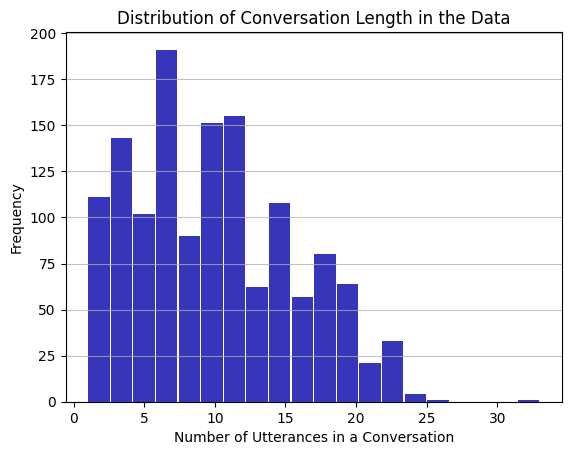

In [37]:
plt.hist(x=utterance_count, bins='auto', color='#0504aa', alpha=0.8, rwidth=0.95)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Number of Utterances in a Conversation')
plt.ylabel('Frequency')
plt.title('Distribution of Conversation Length in the Data')
plt.show() 

In [51]:
speakers = {}
for i in range(len(text_data)):
    for j in range(len(text_data[i]['conversation'])):
        speaker = text_data[i]['conversation'][j]['speaker']
        if speaker not in speakers:
            speakers[speaker] = 1
        else:
            speakers[speaker] += 1
        
print(f"Number of speakers: {len(speakers)}")
sorted_speakers = {key:speakers[key] for key in sorted(speakers, key=speakers.get, reverse=True)}
print(sorted_speakers)

Number of speakers: 312
{'Joey': 2044, 'Ross': 2026, 'Rachel': 1950, 'Phoebe': 1779, 'Monica': 1767, 'Chandler': 1737, 'Janice': 84, 'Tag': 60, 'Carol': 59, 'Emily': 59, 'All': 52, 'Mona': 46, 'Doug': 44, 'Joanna': 38, 'Frank': 37, 'Pete': 37, 'Susan': 34, 'Woman': 34, 'Mark': 34, 'Paul': 31, 'Richard': 31, 'Gunther': 29, 'Mr. Treeger': 27, 'Mr. Geller': 26, 'Phoebe Sr': 26, 'Mrs. Geller': 24, 'Julie': 24, 'Danny': 24, 'Elizabeth': 23, 'Gary': 22, 'Director': 21, 'Mike': 21, 'Guy': 19, 'Man': 19, 'Lydia': 18, 'Eric': 18, 'Chip': 18, 'David': 18, 'Dr. Green': 18, 'Earl': 17, 'Barry': 16, 'Jill': 15, 'Nurse': 15, 'Steve': 15, 'Chloe': 15, 'Kate': 15, 'Dana': 15, 'Dina': 15, 'Leslie': 14, 'Bonnie': 14, 'Janine': 14, 'Charlie': 14, 'Mr. Tribbiani': 13, 'Joshua': 13, 'Kim': 13, 'The Casting Director': 13, 'Ben': 13, 'Kristen': 13, 'Cassie': 13, 'Dr. Long': 13, 'Julio': 12, 'Katie': 12, 'Russell': 12, 'Cliff': 12, 'Bob': 11, 'Duncan': 11, 'Issac': 11, 'Mischa': 11, 'Kathy': 11, 'Tour Guide':

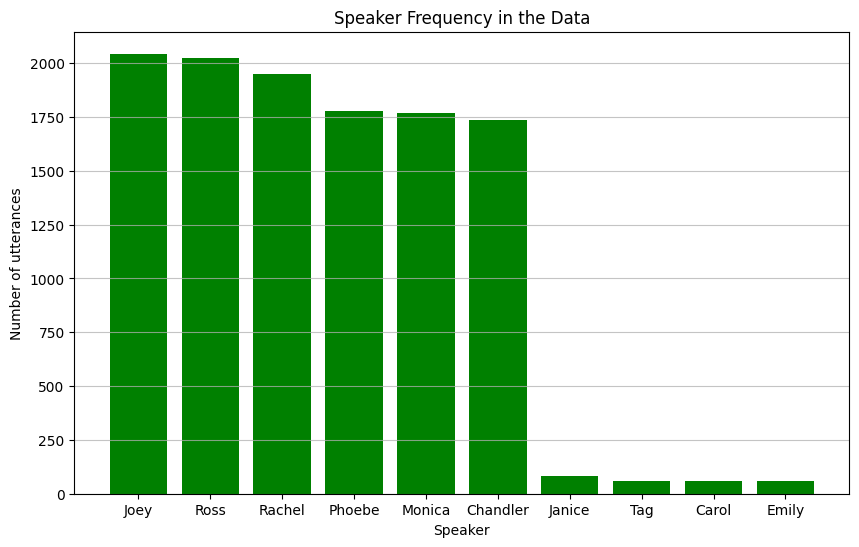

In [60]:
first_ten = dict(list(sorted_speakers.items())[:10])
plt.figure(figsize=(10,6))
plt.grid(axis='y', alpha=0.75)
plt.bar(first_ten.keys(), first_ten.values(), color='g')
plt.xlabel('Speaker')
plt.ylabel('Number of utterances')
plt.title('Speaker Frequency in the Data')
plt.show()

In [74]:
conv_word_count = []
for i in range(len(text_data)):
    word_count = 0
    for j in range(len(text_data[i]['conversation'])):
        text = text_data[i]['conversation'][j]['text']
        count = len(text.split())
        word_count += count
    conv_word_count.append(word_count)

In [76]:
print(f"Total number of words: {np.sum(conv_word_count)}")
print(f"Mean number of words in a conversation: {np.mean(conv_word_count):.4f}")
print(f"Min number of words in a conversation: {np.min(conv_word_count)}")
print(f"Max number of words in a conversation: {np.max(conv_word_count)}")
print(f"SD number of words: {np.std(conv_word_count):.4f}")

Total number of words: 153141
Mean number of words in a conversation: 111.4563
Min number of words in a conversation: 2
Max number of words in a conversation: 529
SD number of words: 68.7284


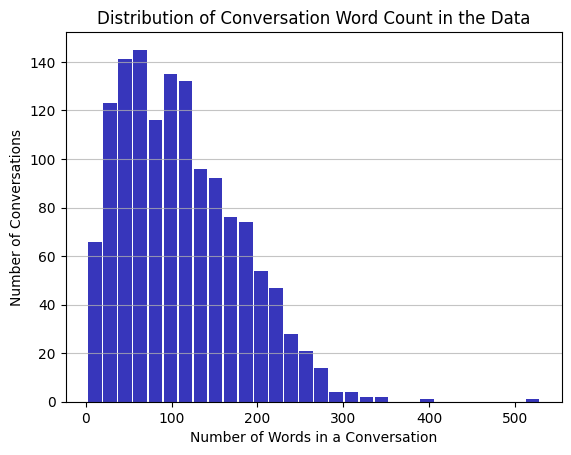

In [83]:
plt.hist(x=conv_word_count, bins='auto', color='#0504aa', alpha=0.8, rwidth=0.9)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Number of Words in a Conversation')
plt.ylabel('Number of Conversations')
plt.title('Distribution of Conversation Word Count in the Data')
plt.show() 